# Experiments
Presentation of complexities of Brute Force and Dynamic Programming algorithms for different input size and different sets

In [1]:
# pandas and numpy used for help with displaying and manipulating data

import pandas as pd
import numpy as np

In [2]:
# Preparing datasets

from functions.dataset_generation import generate_set

n_sizes = list(range(5, 51, 5))
targets = [int(target ** 1.7) for target in n_sizes]

data_generation_inputs = [(input[0], input[1]) for input in list(zip(n_sizes, targets))]

datasets = []
for data in data_generation_inputs:
    sets = [generate_set(data[0], data[1]) for i in range(5)]
    datasets.append(sets)

# Prepared 5 different datasets for each length of set (n)

datasets_df = pd.DataFrame(datasets)
datasets_df.head()

,0,1,2,3,4
0,"([1, 4, 6, 6, 7], 15)","([5, 5, 0, 7, 5], 15)","([5, 0, 5, 1, 2], 15)","([4, 5, 4, 4, 4], 15)","([7, 2, 5, 6, 4], 15)"
1,"([12, 1, 1, 2, 15, 7, 6, 5, 8, 18], 50)","([20, 3, 16, 2, 10, 9, 5, 19, 21, 10], 50)","([13, 8, 6, 0, 22, 24, 15, 12, 3, 24], 50)","([11, 8, 25, 9, 4, 12, 18, 12, 18, 18], 50)","([21, 2, 5, 21, 3, 24, 1, 22, 9, 4], 50)"
2,"([39, 18, 22, 39, 41, 1, 20, 48, 45, 13, 42, 3...","([38, 6, 0, 44, 9, 1, 10, 43, 29, 12, 4, 42, 3...","([23, 17, 12, 4, 13, 41, 29, 17, 7, 43, 35, 38...","([8, 8, 12, 10, 7, 38, 35, 16, 13, 14, 28, 34,...","([41, 20, 25, 41, 7, 25, 15, 17, 23, 41, 34, 1..."
3,"([67, 76, 40, 66, 3, 31, 50, 18, 21, 60, 39, 2...","([47, 0, 36, 19, 66, 38, 16, 26, 23, 41, 78, 6...","([10, 2, 25, 49, 73, 53, 34, 13, 76, 32, 73, 4...","([8, 32, 72, 56, 34, 0, 50, 68, 79, 40, 75, 69...","([43, 26, 18, 60, 10, 14, 23, 10, 19, 56, 42, ..."
4,"([23, 25, 1, 42, 116, 104, 28, 106, 21, 115, 1...","([24, 46, 110, 83, 82, 4, 34, 0, 75, 30, 5, 86...","([43, 27, 24, 43, 42, 38, 2, 118, 15, 107, 11,...","([46, 52, 5, 34, 94, 27, 20, 28, 54, 100, 38, ...","([100, 77, 42, 23, 75, 32, 76, 43, 46, 55, 82,..."


In [3]:
# Running algorithms

from functions.bf import subset_sum_BF
from functions.dp import subset_sum_DP
from functions.decorators import measurements
        
outputs = []
    
for dataset in datasets:
    n_set = []
    for single_set in dataset:
        set = single_set[0]
        target = single_set[1]
        n = len(set)
        bf = measurements(subset_sum_BF)(set=set, target=target, n=len(set))
        dp = measurements(subset_sum_DP)(set=set, target=target)

        output = ((bf[0], bf[1], bf[2]), (dp[0], dp[1], dp[2]))
        n_set.append(output)
    outputs.append(n_set)

# Outputs of algorithms for every dataset
        
outputs_df = pd.DataFrame(outputs)
outputs_df.head()

,0,1,2,3,4
0,"((7.21e-05, 0.003104, (False, 14, [1, 6, 7])),...","((4.87e-05, 0.001568, (True, 15, [5, 5, 0, 5])...","((4.43e-05, 0.000416, (False, 13, [5, 0, 5, 1,...","((4.96e-05, 0.000808, (False, 13, [5, 4, 4])),...","((4.8e-05, 0.000808, (True, 15, [5, 6, 4])), (..."
1,"((0.0015543, 0.004499, (True, 50, [12, 1, 6, 5...","((0.0006114, 0.001248, (True, 50, [19, 21, 10]...","((0.0008064, 0.001626, (True, 50, [8, 0, 15, 3...","((0.000734, 0.00112, (True, 50, [8, 12, 12, 18...","((0.0013812, 0.00128, (True, 50, [2, 21, 1, 22..."
2,"((0.0040289, 0.004568, (True, 99, [1, 20, 45, ...","((0.012741, 0.001912, (True, 99, [6, 0, 9, 10,...","((0.007696, 0.00172, (True, 99, [4, 35, 8, 26,...","((0.008825, 0.001816, (True, 99, [13, 34, 46, ...","((0.0033284, 0.001688, (True, 99, [43, 20, 36]..."
3,"((0.0620468, 0.005264, (True, 162, [26, 5, 28,...","((0.024205, 0.002256, (True, 162, [16, 7, 24, ...","((0.0174818, 0.002224, (True, 162, [2, 32, 40,...","((0.0057282, 0.00216, (True, 162, [8, 0, 68, 4...","((0.0331649, 0.002384, (True, 162, [14, 10, 8,..."
4,"((0.0995182, 0.005768, (True, 237, [23, 58, 28...","((0.2623543, 0.002952, (True, 237, [5, 32, 28,...","((0.2941589, 0.003016, (True, 237, [24, 29, 28...","((0.113238, 0.002888, (True, 237, [5, 28, 29, ...","((0.0175728, 0.002568, (True, 237, [23, 55, 43..."


In [4]:
# Preparing charts

%matplotlib inline

import matplotlib.pyplot as plt

colors = ['r', 'b', 'g', 'm', 'k']
markers = ['o', 'v', '^', '<', '>']
labels = [f'Sets no.{number}' for number in range(1,6)]

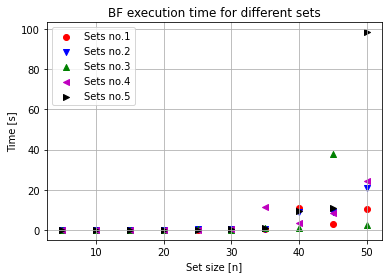

In [5]:
# Brute Force algorithm time complexity (different sets)

bf_time = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[0][0])
    bf_time.append(y)
    
zipped = zip(bf_time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, color=color, marker=marker)
    
plt.title('BF execution time for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

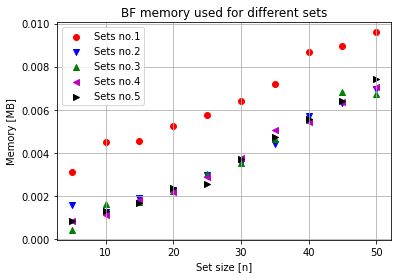

In [6]:
# Brute force algorithm memory complexity (different sets)

bf_memory = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[0][1])
    bf_memory.append(y)
    
zipped = zip(bf_memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('BF memory used for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

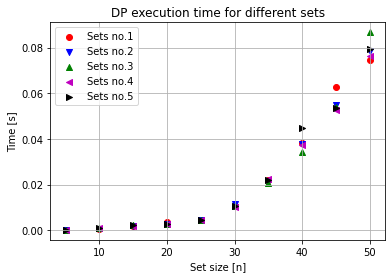

In [7]:
# Dynamic programming algorithm time complexity (different sets)

dp_time = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[1][0])
    dp_time.append(y)
    
zipped = zip(dp_time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('DP execution time for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

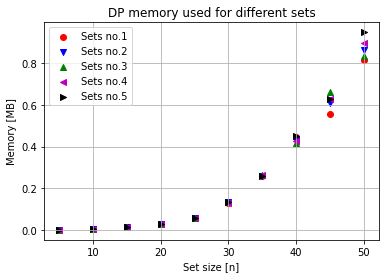

In [8]:
# Dynamic programming algorithm memory complexity (different sets)

dp_memory = []

for (index, colname) in enumerate(outputs_df):
    y = []
    for value in outputs_df[colname].values:
        y.append(value[1][1])
    dp_memory.append(y)
    
zipped = zip(dp_memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    
plt.title('DP memory used for different sets')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

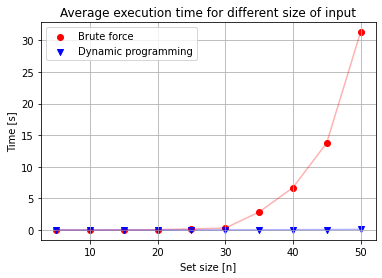

In [9]:
# Time complexity comparison (BF and DP)

bf_time = []
dp_time = []

for index, row in outputs_df.iterrows():
    bf_time_set = [value[0][0] for value in row]
    dp_time_set = [value[1][0] for value in row]
    
    bf_time.append(np.mean(bf_time_set))
    dp_time.append(np.mean(dp_time_set))

time = (bf_time, dp_time)

labels = ('Brute force', 'Dynamic programming')

zipped = zip(time, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(x=n_sizes, y=asset, label=label, c=color, marker=marker)
    plt.plot(n_sizes, asset, c=color, alpha=0.3)
    
plt.title('Average execution time for different size of input')
plt.xlabel('Set size [n]')
plt.ylabel('Time [s]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

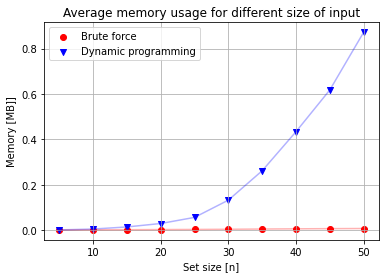

In [10]:
# Memory complexity comparison (BF and DP)

bf_memory = []
dp_memory = []

for index, row in outputs_df.iterrows():
    bf_memory_set = [value[0][1] for value in row]
    dp_memory_set = [value[1][1] for value in row]
    
    bf_memory.append(np.mean(bf_memory_set))
    dp_memory.append(np.mean(dp_memory_set))

memory = (bf_memory, dp_memory)

labels = ('Brute force', 'Dynamic programming')

zipped = zip(memory, colors, labels, markers)
    
for asset, color, label, marker in zipped:
    plt.scatter(n_sizes, asset, label=label, c=color, marker=marker)
    plt.plot(n_sizes, asset, c=color, alpha=0.3)
    
plt.title('Average memory usage for different size of input')
plt.xlabel('Set size [n]')
plt.ylabel('Memory [MB]]')
plt.legend(loc='upper left')

plt.grid(True)
plt.show()

In [11]:
# Accuracy check

from sklearn.metrics import accuracy_score

bf_scores = []
dp_scores = []

for (index, colname) in enumerate(outputs_df):
    for value in outputs_df[colname].values:
        bf_scores.append(value[0][2][1])
        dp_scores.append(value[1][2][1])

accuracy_score(bf_scores, dp_scores)

1.0